### Importing Libraries  

In [2]:
# Importing the required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import confusion_matrix, r2_score,mean_squared_error,mean_absolute_error
from sklearn.impute import SimpleImputer

import warnings
warnings.filterwarnings('ignore')

### Importing Dataset

In [4]:
# Importing the dataset
df = pd.read_csv("IMDb Movies India.csv", encoding='ISO-8859-1')

In [5]:
# first five rows of the dataset
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


### Data Cleaning and Preprocessing

In [7]:
# getting details of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [8]:
# getting number of rows and columns
print(df.shape)

(15509, 10)


In [9]:
# statistical information of dataset
df.describe(include='all')

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
count,15509,14981,7240,13632,7919.000000,7920,14984,13892,13125,12365
unique,13838,102,182,485,NaN,2034,5938,4718,4891,4820
top,Anjaam,(2019),120 min,Drama,NaN,8,Jayant Desai,Ashok Kumar,Rekha,Pran
freq,7,410,240,2780,NaN,227,58,158,83,91
mean,NaN,NaN,NaN,NaN,5.841621,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,1.381777,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,1.100000,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,4.900000,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,6.800000,NaN,NaN,NaN,NaN,NaN


In [10]:
# checking missing and null values
df.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [11]:
# drop missing and null values from dataset
df.dropna(inplace=True)

In [12]:
# drop duplicated values 
df.drop_duplicates(inplace=True)

In [13]:
# converting year column to int and remove parathensis
df['Year'] = df['Year'].astype(str)
df['Year'] = df['Year'].str.extract('(\d+)').astype(int)

# converting the Duration column to int and remove parenthesis
df['Duration'] = df['Duration'].astype(str)
df['Duration'] = df['Duration'].str.extract('(\d+)').astype(int)

In [14]:
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,2019,110,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,1997,147,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,2005,142,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,2012,82,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


### **Averaging Column Elements**

In [16]:
df['Genre_Average_Rating'] = df.groupby('Genre')['Rating'].transform('mean')
df['Director_Average_Rating'] = df.groupby('Director')['Rating'].transform('mean')
df['Actor1_Average_Rating'] = df.groupby('Actor 1')['Rating'].transform('mean')
df['Actor2_Average_Rating'] = df.groupby('Actor 2')['Rating'].transform('mean')
df['Actor3_Average_Rating'] = df.groupby('Actor 3')['Rating'].transform('mean')


###  **Training The Model** 

#### 1. Define feature and target variables

In [19]:
X = df[['Year', 'Votes', 'Duration', 'Genre_Average_Rating', 'Director_Average_Rating', 'Actor1_Average_Rating', 'Actor2_Average_Rating', 'Actor3_Average_Rating']]
y = df['Rating']

#### 2. Train the Random Forest Model And Heatmap

In [21]:
print("Unique values in 'Rating' column before cleaning:", df['Rating'].unique())
print("Unique values in 'Rating' column after cleaning:", df['Rating'].unique())
print("Unique values in 'Votes' column before cleaning:", df['Votes'].unique())
print("------------------------------------------------------------------------------------------------------")
df['Votes'] = pd.to_numeric(df['Votes'], errors='coerce')
print("Unique values in 'Votes' column after cleaning:", df['Votes'].unique())
print("Unique values in 'Year' column before cleaning:", df['Year'].unique())
print("------------------------------------------------------------------------------------------------------")
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')
print("Unique values in 'Year' column after cleaning:", df['Year'].unique())
print("Unique values in 'Duration' column before cleaning:", df['Duration'].unique())
print("------------------------------------------------------------------------------------------------------")
df['Duration'] = pd.to_numeric(df['Duration'], errors='coerce')
print("Unique values in 'Duration' column after cleaning:", df['Duration'].unique())

Unique values in 'Rating' column before cleaning: [ 7.   4.4  4.7  7.4  5.6  4.   6.2  5.9  6.5  5.7  6.3  7.2  6.6  7.3
  7.1  6.9  3.5  4.5  6.4  4.1  4.8  8.1  5.5  6.8  5.   6.1  7.7  5.1
  3.3  7.8  8.4  4.3  5.8  7.5  3.6  4.6  4.2  5.3  5.4  3.   8.   6.
  3.1  3.8  7.9  2.7  2.4  7.6  6.7  3.4  5.2  4.9  2.8  3.7  3.9  3.2
  2.9  8.2  8.7  8.3  9.3  8.8  2.1  2.5  2.3  8.5  8.6  2.6  1.7  9.
  1.4  8.9  1.9  9.4  9.7  1.8  9.2  2.   9.1 10.   1.6  2.2  1.1]
Unique values in 'Rating' column after cleaning: [ 7.   4.4  4.7  7.4  5.6  4.   6.2  5.9  6.5  5.7  6.3  7.2  6.6  7.3
  7.1  6.9  3.5  4.5  6.4  4.1  4.8  8.1  5.5  6.8  5.   6.1  7.7  5.1
  3.3  7.8  8.4  4.3  5.8  7.5  3.6  4.6  4.2  5.3  5.4  3.   8.   6.
  3.1  3.8  7.9  2.7  2.4  7.6  6.7  3.4  5.2  4.9  2.8  3.7  3.9  3.2
  2.9  8.2  8.7  8.3  9.3  8.8  2.1  2.5  2.3  8.5  8.6  2.6  1.7  9.
  1.4  8.9  1.9  9.4  9.7  1.8  9.2  2.   9.1 10.   1.6  2.2  1.1]
Unique values in 'Votes' column before cleaning: ['8' '35' '8

In [22]:
# setting x and y values
categorical_columns = []
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)
df = df.select_dtypes(include=[np.number])
df = df.dropna(subset=['Rating'])

X = df.drop(columns=['Rating'])
y = df['Rating']

In [23]:
# transforming values
imputer = SimpleImputer(strategy='median')
X = imputer.fit_transform(X)

In [24]:
# train,test,split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
# selecting the model
random_forest_model = RandomForestRegressor(random_state=42)
linear_regression_model = LinearRegression()

In [26]:
# fit the x_train and y_train in model
random_forest_model.fit(X_train, y_train)
linear_regression_model.fit(X_train, y_train)

LinearRegression()

In [27]:
# giving x_test to prediction
y_pred_rf = random_forest_model.predict(X_test)
y_pred_lr = linear_regression_model.predict(X_test)

In [28]:
# mse_rf and mse_lr
mse_rf = mean_squared_error(y_test, y_pred_rf)
mse_lr = mean_squared_error(y_test, y_pred_lr)

In [29]:
# getting datatypes in dataset
print("Data types in the dataset:")
print(df.dtypes)

Data types in the dataset:
Year                         int32
Duration                     int32
Rating                     float64
Votes                      float64
Genre_Average_Rating       float64
Director_Average_Rating    float64
Actor1_Average_Rating      float64
Actor2_Average_Rating      float64
Actor3_Average_Rating      float64
dtype: object


In [30]:
# filling values in dataset
numeric_df = df.select_dtypes(include=[np.number])
numeric_df.fillna(numeric_df.median(), inplace=True)

In [31]:
# getting correlation matrix
correlation_matrix = numeric_df.corr()

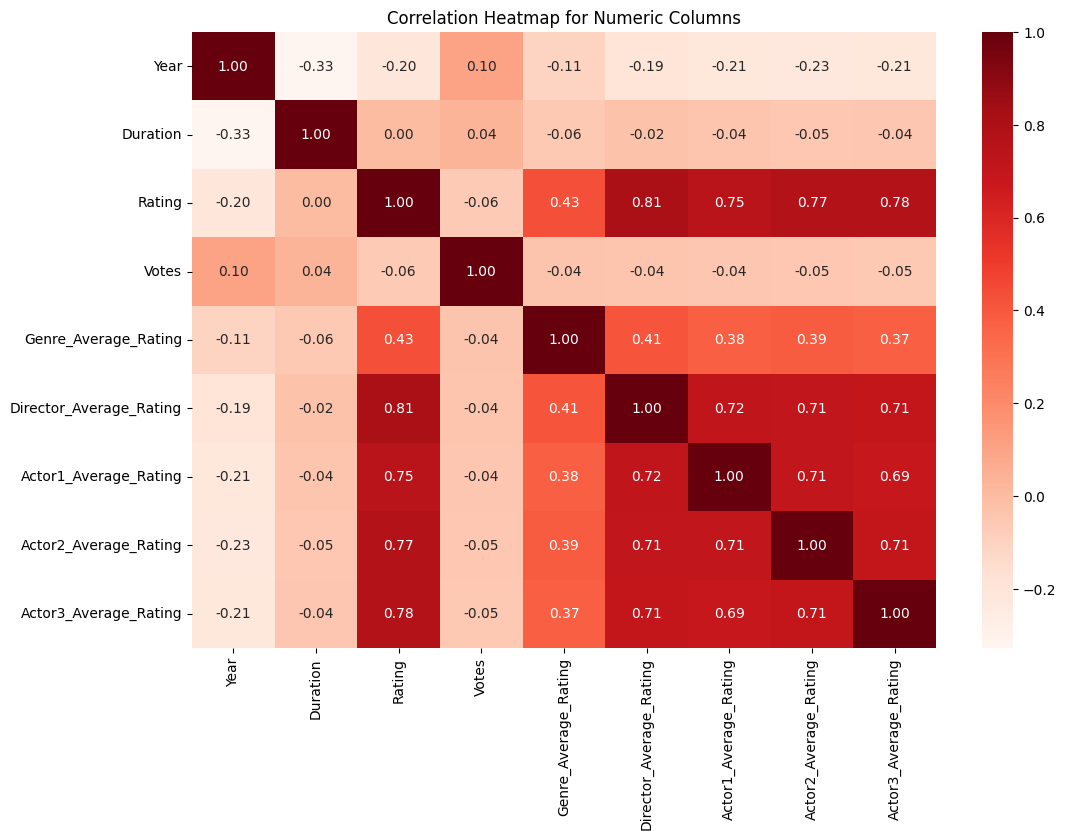

In [32]:
# plotting correlation matrix using heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='Reds', fmt='.2f', cbar=True)
plt.title("Correlation Heatmap for Numeric Columns")
plt.show()

In [33]:
# getting mse_rf and mse_lr
print(f"Random Forest Mean Squared Error: {mse_rf}")
print(f"Linear Regression Mean Squared Error: {mse_lr}")

Random Forest Mean Squared Error: 0.38473747879858655
Linear Regression Mean Squared Error: 0.4309157525513215


### **Visualization Of Numerical Features**

#### 1. Numeric Features 

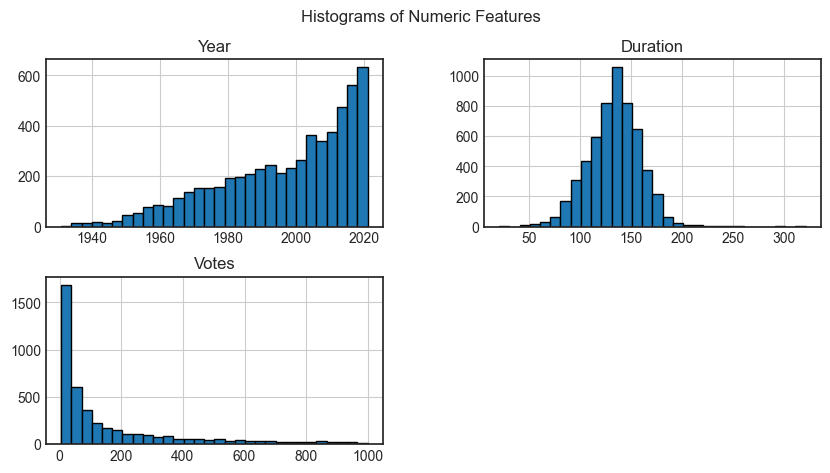

In [36]:
plt.style.use('seaborn-v0_8-white')
df[['Year', 'Duration', 'Votes']].hist(bins=30, edgecolor='black', figsize=(10, 5))
plt.suptitle('Histograms of Numeric Features')
plt.show()

#### 2. Distribution Of Rating  

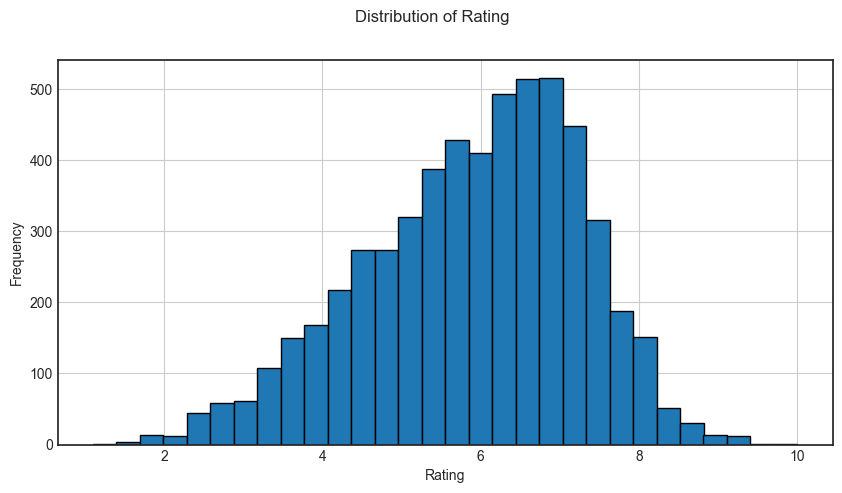

In [38]:
df['Rating'].hist(bins=30, edgecolor='black', figsize=(10, 5))
plt.suptitle('Distribution of Rating')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

#### 3. Top 10 Directors

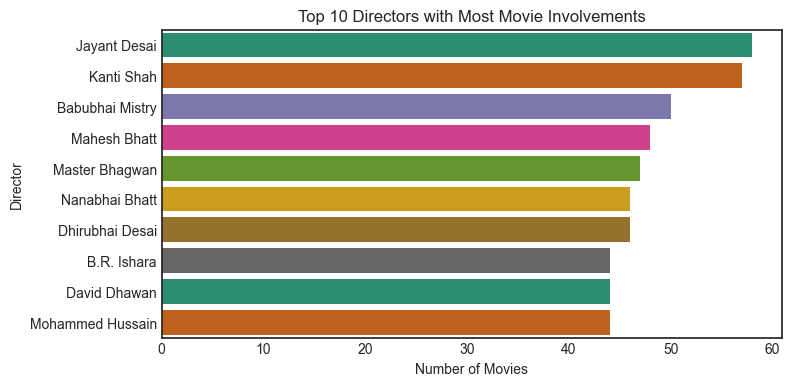

In [40]:
df = pd.read_csv("IMDb Movies India.csv", encoding='ISO-8859-1')
top_10_directors = df['Director'].value_counts().head(10)
plt.figure(figsize=(8, 4))
sns.barplot(x=top_10_directors.values, y=top_10_directors.index, palette='Dark2')
plt.title('Top 10 Directors with Most Movie Involvements')
plt.xlabel('Number of Movies')
plt.ylabel('Director')
plt.show()

#### 4. Top 10 Genres

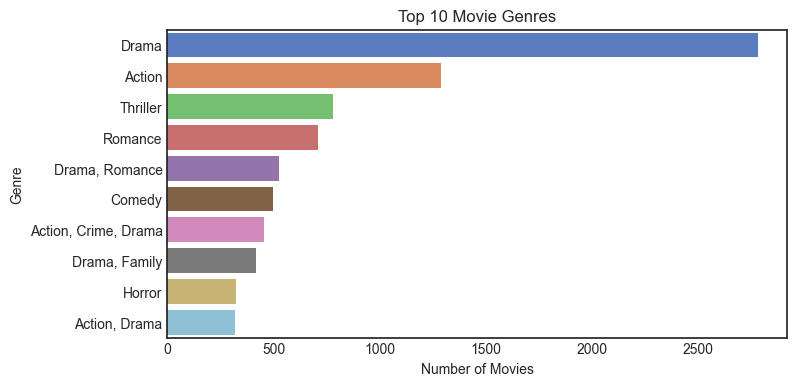

In [42]:
top_10_genres = df['Genre'].value_counts().head(10)
plt.figure(figsize=(8, 4))
sns.barplot(x=top_10_genres.values, y=top_10_genres.index, palette='muted')
plt.title('Top 10 Movie Genres')
plt.xlabel('Number of Movies')
plt.ylabel('Genre')
plt.show()

#### 5. Linear Regression Result

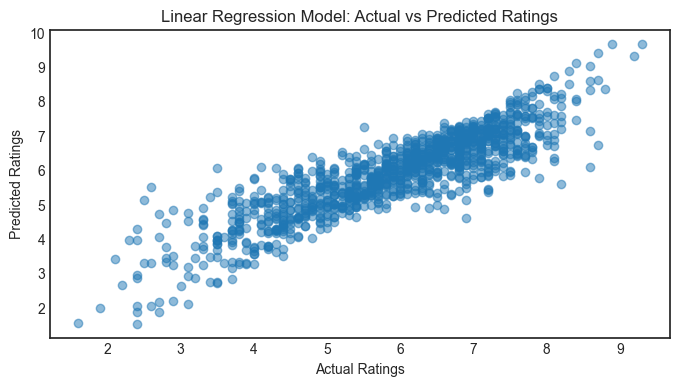

In [44]:
plt.figure(figsize=(8, 4))
plt.scatter(y_test, y_pred_lr, alpha=0.5)
plt.title('Linear Regression Model: Actual vs Predicted Ratings')
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.show()

#### 6. Random Forest Result 

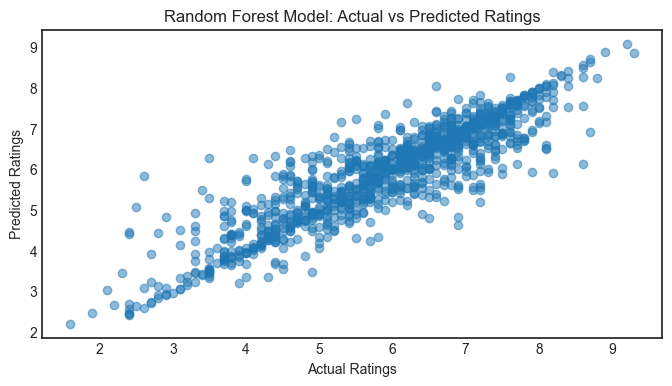

In [46]:
plt.figure(figsize=(8,4))
plt.scatter(y_test, y_pred_rf, alpha=0.5)
plt.title('Random Forest Model: Actual vs Predicted Ratings')
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.show()

### **Model Evaluation**

In [48]:
y_pred_rf = random_forest_model.predict(X_test)
print("Performance Evaluation for Random Forest Model:")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred_rf)}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred_rf)}")
print(f"R2 Score: {r2_score(y_test, y_pred_rf)}")

Performance Evaluation for Random Forest Model:
Mean Squared Error: 0.38473747879858655
Mean Absolute Error: 0.42001060070671375
R2 Score: 0.7922296211992341


###  **User Input**

#### 1. Getting The inputs

In [51]:
#print("\nProvide the following details to predict the movie rating:")
#year = int(input("Enter the Year: "))
#votes = int(input("Enter the number of Votes: "))
#duration = int(input("Enter the Duration (in minutes): "))
#genre = input("Enter the Genre: ")
#director = input("Enter the Director: ")
#actor1 = input("Enter the Actor 1: ")
#actor2 = input("Enter Actor 2: ")
#actor3 = input("Enter Actor 3: ")

In [52]:
year = 1998
votes = 2444545
duration = 134
genre = 'Drama','Romance'
director ='Mahesh Bhatt'
actor1='Amitabh Bhachan'
actor2 = 'Rekha'
actor3 = 'nil'

#### 2. Analysing The Inputs And Final Prediction

In [54]:
# getting average rating by Grouping Genre, Director, Actor 1, Actor 2 and Actor 3 with respect to Rating
genre_avg_rating = df.groupby('Genre')['Rating'].mean().to_dict()
director_avg_rating = df.groupby('Director')['Rating'].mean().to_dict()
actor1_avg_rating = df.groupby('Actor 1')['Rating'].mean().to_dict()
actor2_avg_rating = df.groupby('Actor 2')['Rating'].mean().to_dict()
actor3_avg_rating = df.groupby('Actor 3')['Rating'].mean().to_dict()

In [55]:
# getting average rating value by Grouping Genre, Director, Actor 1, Actor 2 and Actor 3 with respect to Rating
genre_avg_rating_value = genre_avg_rating.get(genre, df['Rating'].mean())
director_avg_rating_value = director_avg_rating.get(director, df['Rating'].mean())
actor1_avg_rating_value = actor1_avg_rating.get(actor1, df['Rating'].mean())
actor2_avg_rating_value = actor2_avg_rating.get(actor2, df['Rating'].mean())
actor3_avg_rating_value = actor3_avg_rating.get(actor3, df['Rating'].mean())

In [56]:
# printting the different average rating values
print("Average rating for genre:", genre_avg_rating_value)
print("Average rating for director:", director_avg_rating_value)
print("Average rating for actor 1:", actor1_avg_rating_value)
print("Average rating for actor 2:", actor2_avg_rating_value)
print("Average rating for actor 3:", actor3_avg_rating_value)

Average rating for genre: 5.841621416845562
Average rating for director: 5.414893617021277
Average rating for actor 1: 5.841621416845562
Average rating for actor 2: 5.689873417721519
Average rating for actor 3: 5.841621416845562


In [57]:
# creating dictionary of all given values
data = {
    'Year': [year],
    'Votes': [votes],
    'Duration': [duration],
    'Genre_Average_Rating': [genre_avg_rating_value],
    'Director_Average_Rating': [director_avg_rating_value],
    'Actor1_Average_Rating': [actor1_avg_rating_value],
    'Actor2_Average_Rating': [actor2_avg_rating_value],
    'Actor3_Average_Rating': [actor3_avg_rating_value]
}

In [58]:
# predicted rating value
input_data = pd.DataFrame(data)
predicted_rating = random_forest_model.predict(input_data)[0]
print(f"\nPredicted IMDB:", predicted_rating)


Predicted IMDB: 5.9019999999999975


### **Conclusion -**
**This model is based on Random Forest Model which has an accuracy of about 78.45% and it invloves user input.I have given a sample data for showing the working.**